In [1]:
%load_ext autoreload
%autoreload 2
    
from diffusers import DiffusionPipeline
import torch
from PIL import Image
import os
import argparse
import yaml
import pickle
import json
import shutil
import sys


/workspace/oa_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/workspace/OneActor/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
with open("PATH.json","r") as f:
    ENV_CONFIGS = json.load(f)
# get user configs
with open('config/gen_tune_inference.yaml', "r") as f:
    config = yaml.safe_load(f)
device = config['device']
pipeline = DiffusionPipeline.from_pretrained(ENV_CONFIGS['paths']['sdxl_path']).to(device)
prompt = config['source_prompt']
guidance_scale = config['guidance_scale']
steps = config['steps']
generator = torch.manual_seed(config['g_seed'])
# make data dirs
data_root = config['data_root'] 
os.makedirs(data_root, exist_ok=True)
data_root += "/" + config['dir_name']
os.makedirs(data_root, exist_ok=True)
# copy the config
shutil.copyfile('config/gen_tune_inference.yaml', data_root+'/config.yaml')
# use original pipeline to prepare data

/workspace/oa_venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/workspace/OneActor/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  8.62it/s]


'data/demo/a_rugger_adventurer_with_tousled_hair_comic_book_stile/config.yaml'

In [ ]:
res = {}

In [75]:
# prompt_base = "A young woman with long wavy hair wairing sundress, photo realistic"
# prompts = ['', 'standing in wildflowers',
#    'walking on sunset beach',
#    'sitting at cafe']

prompt_base = 'A digital painting of a teenage boy with black hair, a slight build'
prompts = ['', 'wearing green knitted hat',
   'in a dense forest',
   'dressed as an astranaut']          


prompt_base = "A 50 years old man with curly hair, photo"
prompts = ['', 'in the park',
   'reading a book',
   'at the beach']    

for prompt in prompts:
    prompt = prompt_base + " " + prompt
    res[prompt] = pipeline(prompt, neg_prompt=config['source_neg_prompt'], 
                                                    num_inference_steps=15, guidance_scale=guidance_scale, generator=generator,
                                                    oneactor_save=True)


oneactor_save = True
prompt = A 50 years old man with curly hair, photo 
prompt_2 = None
latents = None


  0%|          | 0/15 [00:00<?, ?it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=925.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


  7%|▋         | 1/15 [00:00<00:09,  1.49it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=859.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 13%|█▎        | 2/15 [00:01<00:08,  1.53it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=793.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 20%|██        | 3/15 [00:01<00:07,  1.54it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=727.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 27%|██▋       | 4/15 [00:02<00:07,  1.55it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=661.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 33%|███▎      | 5/15 [00:03<00:06,  1.55it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=595.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 40%|████      | 6/15 [00:03<00:05,  1.55it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=529.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 47%|████▋     | 7/15 [00:04<00:05,  1.55it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=463.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 53%|█████▎    | 8/15 [00:05<00:04,  1.55it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=397.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 60%|██████    | 9/15 [00:05<00:03,  1.55it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=331.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 67%|██████▋   | 10/15 [00:06<00:03,  1.55it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=265.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 73%|███████▎  | 11/15 [00:07<00:02,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=199.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 80%|████████  | 12/15 [00:07<00:01,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=133.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 87%|████████▋ | 13/15 [00:08<00:01,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=67.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 93%|█████████▎| 14/15 [00:09<00:00,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=1.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


100%|██████████| 15/15 [00:09<00:00,  1.55it/s]


oneactor_save = True
prompt = A 50 years old man with curly hair, photo in the park
prompt_2 = None
latents = None


  0%|          | 0/15 [00:00<?, ?it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=925.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


  7%|▋         | 1/15 [00:00<00:08,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=859.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 13%|█▎        | 2/15 [00:01<00:08,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=793.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 20%|██        | 3/15 [00:01<00:07,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=727.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 27%|██▋       | 4/15 [00:02<00:07,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=661.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 33%|███▎      | 5/15 [00:03<00:06,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=595.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 40%|████      | 6/15 [00:03<00:05,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=529.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 47%|████▋     | 7/15 [00:04<00:05,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=463.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 53%|█████▎    | 8/15 [00:05<00:04,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=397.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 60%|██████    | 9/15 [00:05<00:03,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=331.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 67%|██████▋   | 10/15 [00:06<00:03,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=265.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 73%|███████▎  | 11/15 [00:07<00:02,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=199.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 80%|████████  | 12/15 [00:07<00:01,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=133.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 87%|████████▋ | 13/15 [00:08<00:01,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=67.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 93%|█████████▎| 14/15 [00:08<00:00,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=1.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


100%|██████████| 15/15 [00:09<00:00,  1.56it/s]


oneactor_save = True
prompt = A 50 years old man with curly hair, photo reading a book
prompt_2 = None
latents = None


  0%|          | 0/15 [00:00<?, ?it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=925.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


  7%|▋         | 1/15 [00:00<00:09,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=859.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 13%|█▎        | 2/15 [00:01<00:08,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=793.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 20%|██        | 3/15 [00:01<00:07,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=727.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 27%|██▋       | 4/15 [00:02<00:07,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=661.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 33%|███▎      | 5/15 [00:03<00:06,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=595.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 40%|████      | 6/15 [00:03<00:05,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=529.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 47%|████▋     | 7/15 [00:04<00:05,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=463.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 53%|█████▎    | 8/15 [00:05<00:04,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=397.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 60%|██████    | 9/15 [00:05<00:03,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=331.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 67%|██████▋   | 10/15 [00:06<00:03,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=265.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 73%|███████▎  | 11/15 [00:07<00:02,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=199.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 80%|████████  | 12/15 [00:07<00:01,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=133.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 87%|████████▋ | 13/15 [00:08<00:01,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=67.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 93%|█████████▎| 14/15 [00:09<00:00,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=1.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


100%|██████████| 15/15 [00:09<00:00,  1.56it/s]


oneactor_save = True
prompt = A 50 years old man with curly hair, photo at the beach
prompt_2 = None
latents = None


  0%|          | 0/15 [00:00<?, ?it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=925.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


  7%|▋         | 1/15 [00:00<00:09,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=859.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 13%|█▎        | 2/15 [00:01<00:08,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=793.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 20%|██        | 3/15 [00:01<00:07,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=727.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 27%|██▋       | 4/15 [00:02<00:07,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=661.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 33%|███▎      | 5/15 [00:03<00:06,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=595.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 40%|████      | 6/15 [00:03<00:05,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=529.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 47%|████▋     | 7/15 [00:04<00:05,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=463.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 53%|█████▎    | 8/15 [00:05<00:04,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=397.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 60%|██████    | 9/15 [00:05<00:03,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=331.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 67%|██████▋   | 10/15 [00:06<00:03,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=265.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 73%|███████▎  | 11/15 [00:07<00:02,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=199.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 80%|████████  | 12/15 [00:07<00:01,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=133.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 87%|████████▋ | 13/15 [00:08<00:01,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=67.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


 93%|█████████▎| 14/15 [00:08<00:00,  1.56it/s]

latent_model_input torch.Size([2, 4, 128, 128]), t=1.0, prompt_embeds.size()=torch.Size([2, 77, 2048])
sample.size() = torch.Size([2, 4, 128, 128]), mid_save.size() = torch.Size([2, 1280, 32, 32])


100%|██████████| 15/15 [00:09<00:00,  1.56it/s]


In [90]:
res.keys()

dict_keys(['A young woman with long wavy hair wairing sundress, photo realistic ', 'A young woman with long wavy hair wairing sundress, photo realistic standing in wildflowers', 'A young woman with long wavy hair wairing sundress, photo realistic walking on sunset beach', 'A young woman with long wavy hair wairing sundress, photo realistic sitting at cafe', 'A digital painting of a teenage boy with black hair, a slight build ', 'A digital painting of a teenage boy with black hair, a slight build wearing green knitted hat', 'A digital painting of a teenage boy with black hair, a slight build in a dense forest', 'A digital painting of a teenage boy with black hair, a slight build dressed as an astranaut', 'A unicorn with a midnight blue coat and a crystal horn ', 'A unicorn with a midnight blue coat and a crystal horn in a blooming meadow', 'A unicorn with a midnight blue coat and a crystal horn wearing a silver bridle', 'A unicorn with a midnight blue coat and a crystal horn in a blanke

In [66]:
res['A young woman with long wavy hair wairing sundress, photo realistic '][1][12].size()

torch.Size([1, 4, 128, 128])

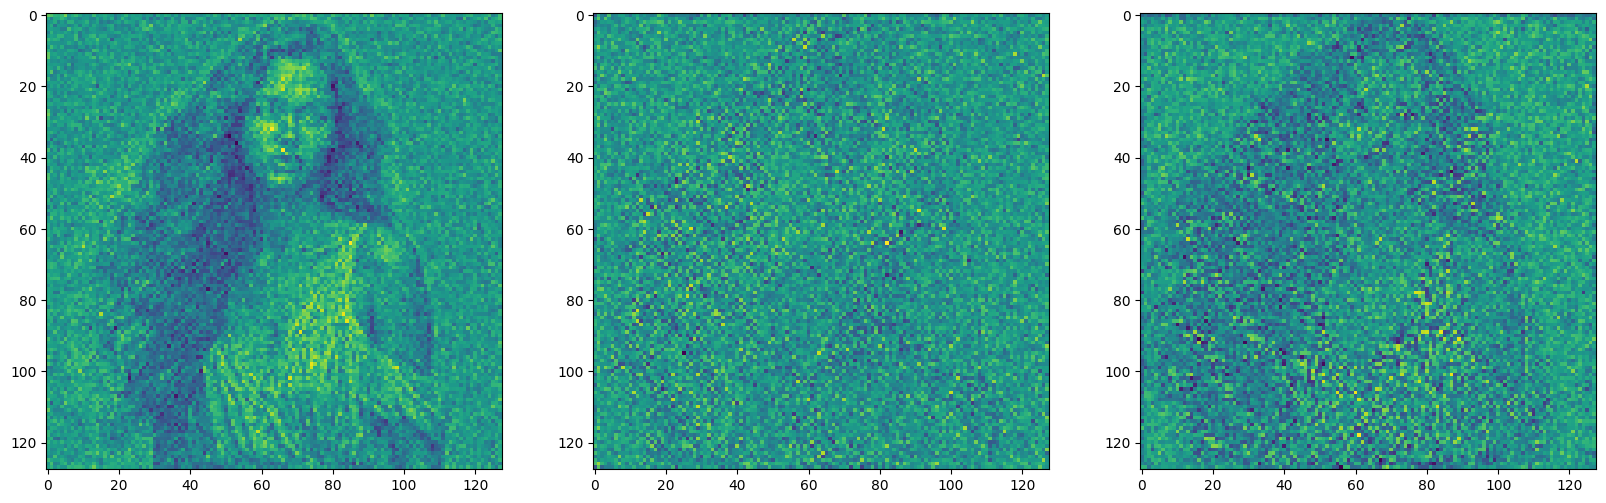

In [67]:
from PIL import Image
import matplotlib.pyplot as plt

f, axarr = plt.subplots(1, 3, figsize=(20, 10))
for n in range(3):
    axarr[n].imshow(res['A young woman with long wavy hair wairing sundress, photo realistic '][1][12][0][n].cpu().detach().numpy())

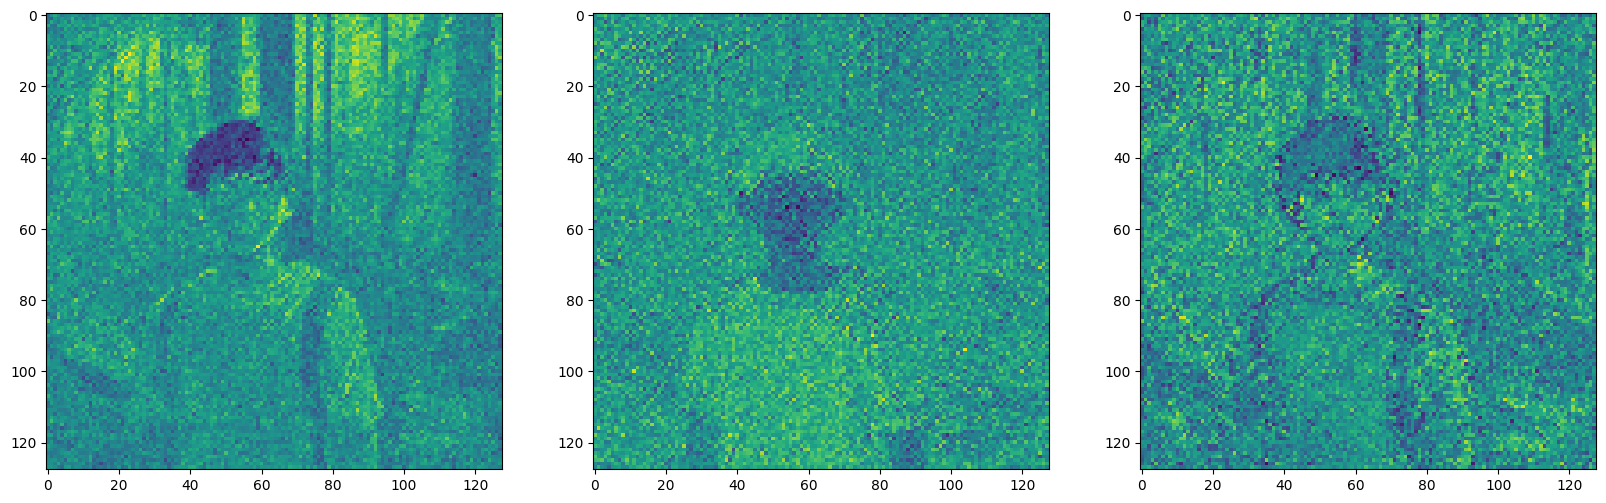

In [68]:
from PIL import Image
import matplotlib.pyplot as plt

f, axarr = plt.subplots(1, 3, figsize=(20, 10))
for n in range(3):
    axarr[n].imshow(res['A digital painting of a teenage boy with black hair, a slight build in a dense forest'][1][12][0][n].cpu().detach().numpy())

In [76]:
import numpy as np
par = 3
__ = np.zeros(shape=(len(list(res.keys())),len(list(res.keys()))))
for n1, key1 in enumerate(list(res.keys())):
    for n2, key2 in enumerate(list(res.keys())):
        __[n1, n2] = torch.mean((res[key1][par][10] - res[key2][par][10])**2)

In [86]:
__.astype(int)

array([[ 0, 22, 24, 27, 22, 20, 26, 24, 27, 26, 24, 23, 23, 25, 26, 22],
       [22,  0, 22, 25, 24, 23, 23, 23, 27, 24, 25, 21, 22, 24, 26, 22],
       [24, 22,  0, 26, 24, 25, 25, 25, 27, 26, 26, 21, 23, 24, 26, 21],
       [27, 25, 26,  0, 27, 27, 27, 27, 29, 28, 29, 26, 26, 26, 28, 26],
       [22, 24, 24, 27,  0, 20, 25, 24, 27, 27, 24, 22, 23, 26, 27, 24],
       [20, 23, 25, 27, 20,  0, 25, 23, 28, 27, 24, 23, 23, 25, 26, 22],
       [26, 23, 25, 27, 25, 25,  0, 25, 28, 27, 27, 24, 25, 25, 27, 26],
       [24, 23, 25, 27, 24, 23, 25,  0, 28, 27, 25, 23, 24, 25, 27, 24],
       [27, 27, 27, 29, 27, 28, 28, 28,  0, 25, 24, 25, 26, 28, 29, 28],
       [26, 24, 26, 28, 27, 27, 27, 27, 25,  0, 25, 24, 26, 27, 28, 26],
       [24, 25, 26, 29, 24, 24, 27, 25, 24, 25,  0, 23, 25, 27, 28, 26],
       [23, 21, 21, 26, 22, 23, 24, 23, 25, 24, 23,  0, 23, 23, 26, 23],
       [23, 22, 23, 26, 23, 23, 25, 24, 26, 26, 25, 23,  0, 23, 25, 22],
       [25, 24, 24, 26, 26, 25, 25, 25, 28, 27, 27,

In [88]:
for i in range(4):
    for j in range(4):
        print(i, j, np.mean(__[i*4:(i+1)*4,j*4:(j+1)*4]) * (16/12 if i == j else 1))

0 0 24.915620803833008
0 1 25.082775115966797
0 2 26.09726095199585
0 3 24.951255559921265
1 0 25.082775115966797
1 1 24.264930725097656
1 2 26.057014107704163
1 3 25.524651288986206
2 0 26.09726095199585
2 1 26.057014107704163
2 2 24.603638648986816
2 3 26.78047788143158
3 0 24.951255559921265
3 1 25.524651288986206
3 2 26.78047788143158
3 3 24.719388008117676


In [29]:
torch.mean((res['A digital painting of a teenage boy with black hair, a slight build in a dense forest'][3][10] - \
    res['A young woman with long wavy hair wairing sundress, photo realistic standing in wildflowers'][3][10])**2)

tensor(26.0195, device='cuda:0')

In [ ]:
image, xt_list_, prompt_embeds, mid_ = pipeline(prompt, neg_prompt=config['source_neg_prompt'], 
                                                num_inference_steps=steps, guidance_scale=guidance_scale, generator=generator,
                                                oneactor_save=True)

In [ ]:
mid_[0].shape

In [ ]:
xt_list_[20].shape

In [ ]:
xt_list_decode = pipeline.vae.decode(xt_list_[20])

In [ ]:
xt_list_decode.sample.size()

In [ ]:
# vae decoded latent
from PIL import Image
import matplotlib.pyplot as plt

f, axarr = plt.subplots(1, 3, figsize=(20, 10))
for n in range(3):
    axarr[n].imshow(xt_list_decode.sample[0][n].cpu().detach().numpy())

In [ ]:
# latent
from PIL import Image
import matplotlib.pyplot as plt

f, axarr = plt.subplots(1, 3, figsize=(20, 10))
for n in range(3):
    axarr[n].imshow(xt_list_[20][0][n].cpu().detach().numpy())

In [ ]:
prompt_embeds.size()

In [ ]:
# text_inputs = pipeline.tokenizer(prompt, return_tensors="pt").to("cuda")
text_embeddings = pipeline.encode_prompt(prompt)  # Corrected text embeddings

In [ ]:
text_embeddings[0].size(), text_embeddings[1].size()

In [ ]:
tokenizers = [pipeline.tokenizer, pipeline.tokenizer_2] if pipeline.tokenizer is not None else [pipeline.tokenizer_2]
text_encoders = (
    [pipeline.text_encoder, pipeline.text_encoder_2] if pipeline.text_encoder is not None else [pipeline.text_encoder_2]
)


In [ ]:
text_inputs = [None] * len(tokenizers)
text_input_ids = [None] * len(tokenizers)
prompt_embeds_my = [None] * len(tokenizers)
for n, (tokenizer, text_encoder) in enumerate(zip(tokenizers, text_encoders)):
    text_inputs[n] = tokenizer(
                        prompt,
                        padding="max_length",
                        max_length=tokenizer.model_max_length,
                        truncation=True,
                        return_tensors="pt",
                    )
    text_input_ids[n] = text_inputs[n].input_ids
    prompt_embeds_my[n] = text_encoder(text_input_ids[n].to(device), output_hidden_states=True).hidden_states[-2]

In [ ]:
prompt_embeds_my = torch.concat(prompt_embeds_my, dim=-1)

In [ ]:
prompt_embeds_my == prompt_embeds[1:]

In [ ]:
mid_[0].shape

In [ ]:
1280*32*32

In [ ]:
len(pipeline.unet.down_blocks)